# 31009 Assignment 5: Support Vector Machines 

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics as skm

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

## 1. Data Processing:

In [11]:
tn = pd.read_csv('data/train_data5.csv')
tt = pd.read_csv('data/test_data5.csv')

tn = tn.dropna(how='any', axis = 0)
tt = tt.dropna(how='any', axis = 0)

print(tn.shape)
print(tt.shape)

(507, 148)
(168, 148)


In [13]:
tt.head()

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,car,1.27,91,0.97,231.38,1.39,1.47,207.92,241.74,244.48,...,26.18,2.00,0.50,0.85,6.29,1.67,0.70,-0.08,56,3806.36
1,concrete,2.36,241,1.56,216.15,2.46,2.51,187.85,229.39,231.20,...,22.29,2.25,0.79,0.55,8.42,1.38,0.81,-0.09,1746,1450.14
2,concrete,2.12,266,1.47,232.18,2.07,2.21,206.54,244.22,245.79,...,15.59,2.19,0.76,0.74,7.24,1.68,0.81,-0.07,566,1094.04
3,concrete,2.42,399,1.28,230.40,2.49,2.73,204.60,243.27,243.32,...,13.51,3.34,0.82,0.74,7.44,1.36,0.92,-0.09,1178,1125.38
4,concrete,2.15,944,1.73,193.18,2.28,4.10,165.98,205.55,208.00,...,15.65,50.08,0.85,0.49,8.15,0.23,1.00,-0.08,6232,1146.38


In [14]:
y_train = tn['class']
y_test  = tt['class']

tn.drop(columns='class', inplace=True)
tt.drop(columns='class', inplace=True)

scaler = StandardScaler()
scaler.fit(tn)

X_train_scaled = pd.DataFrame(scaler.transform(tn), columns=tn.columns)
X_test_scaled  = pd.DataFrame(scaler.transform(tt), columns=tt.columns)

In [16]:
X_test_scaled.head()

,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,-1.221577,-0.675542,-0.476591,1.041138,-0.912836,-1.124818,0.703688,1.082655,1.094633,2.152514,...,0.129506,-0.188670,-3.000051,1.278539,-2.234303,0.474507,0.183615,-0.803547,-1.224828,5.070035
1,0.540344,-0.460631,0.574291,0.800037,0.312553,0.324191,0.364434,0.914359,0.903921,-0.837096,...,-0.189572,-0.138043,-0.261676,-0.241913,0.471713,-0.168031,0.621794,-0.878340,0.316804,0.652683
2,0.152398,-0.424813,0.413987,1.053803,-0.134084,-0.093792,0.680361,1.116450,1.113446,-0.919693,...,-0.739139,-0.150193,-0.544956,0.721040,-1.027395,0.496664,0.621794,-0.728753,-0.759601,-0.014920
3,0.637331,-0.234259,0.075567,1.025624,0.346910,0.630713,0.647568,1.103504,1.077974,-1.000276,...,-0.909751,0.082694,0.021605,0.721040,-0.773309,-0.212344,1.059973,-0.878340,-0.201330,0.043835
4,0.200891,0.546581,0.877087,0.436406,0.106413,2.539504,-0.005246,0.589486,0.570749,0.148025,...,-0.734218,9.548045,0.304885,-0.546003,0.128697,-2.716028,1.378648,-0.803547,4.408971,0.083205


## 2. Random Forest Classifier - Base Model

In [100]:
rf = RandomForestClassifier()

rf.fit(X_train_scaled, y_train)

y_tn_pred_rf = rf.predict(X_train_scaled)
y_tt_pred_rf = rf.predict(X_test_scaled)

In [103]:
print("Random Forest Train Score:", rf.score(X_train_scaled, y_tn_pred_rf))
print("\nRandom Forest Train Confusion Matrix")
print(skm.confusion_matrix(y_train, y_tn_pred_rf))
print("\nRandom Forest Train Classification Report")
print(skm.classification_report(y_train, y_tn_pred_rf))
print('-'*53 + '\n')
print("Random Forest Test Score:", rf.score(X_test_scaled, y_tt_pred_rf))
print("\nRandom Forest Test Confusion Matrix")
print(skm.confusion_matrix(y_test, y_tt_pred_rf))
print("\nRandom Forest Test Classification Report")
print(skm.classification_report(y_test, y_tt_pred_rf))

Random Forest Train Score: 1.0

Random Forest Train Confusion Matrix
[[45  0  0  0  0  0  0  0  0]
 [ 0 97  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0]
 [ 0  1  0 92  0  0  0  0  0]
 [ 0  0  0  0 82  0  0  0  1]
 [ 0  0  0  0  0 14  0  0  0]
 [ 0  0  0  0  0  0 45  0  0]
 [ 0  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  1  0  1  0 87]]

Random Forest Train Classification Report
             precision    recall  f1-score   support

   asphalt        1.00      1.00      1.00        45
  building        0.99      1.00      0.99        97
       car        1.00      1.00      1.00        21
  concrete        1.00      0.99      0.99        93
     grass        0.99      0.99      0.99        83
      pool        1.00      1.00      1.00        14
    shadow        0.98      1.00      0.99        45
      soil        1.00      1.00      1.00        20
      tree        0.99      0.98      0.98        89

avg / total       0.99      0.99      0.99       507

-------------------------------

In [73]:
feature_importances = pd.DataFrame({'feature':tn.columns, 'importance':clf.feature_importances_})
feature_importances.sort_values('importance', ascending=False, inplace=True)

Text(0.5,1,'Feature Importance of Random Forest Base Model')

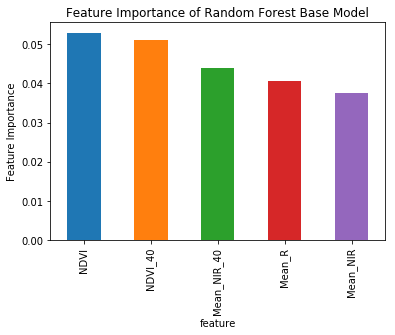

In [78]:
ax = feature_importances.iloc[:5,].plot.bar(x='feature',y='importance', legend=False)
ax.set_ylabel('Feature Importance')
ax.set_title('Feature Importance of Random Forest Base Model')

## 3. LinearSVM Classifier - Base Model

In [98]:
svc = LinearSVC()
svc.fit(X_train_scaled, y_train)

y_tn_pred_svc = svc.predict(X_train_scaled)
y_tt_pred_svc = svc.predict(X_test_scaled)

In [99]:
print("LinearSVM  Train Score:", svc.score(X_train_scaled, y_tn_pred_svc))
print("\nLinearSVM  Train Confusion Matrix")
print(skm.confusion_matrix(y_train, y_tn_pred_svc))
print("\nLinearSVM  Train Classification Report")
print(skm.classification_report(y_train, y_tn_pred_svc))
print('-'*53 + '\n')
print("LinearSVM  Test Score:", svc.score(X_test_scaled, y_tt_pred_svc))
print("\nLinearSVM  Test Confusion Matrix")
print(skm.confusion_matrix(y_test, y_tt_pred_svc))
print("\nLinearSVM  Test Classification Report")
print(skm.classification_report(y_test, y_tt_pred_svc))

LinearSVM  Train Score: 1.0

LinearSVM  Train Confusion Matrix
[[45  0  0  0  0  0  0  0  0]
 [ 0 97  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0]
 [ 0  0  0 93  0  0  0  0  0]
 [ 0  1  0  0 80  0  0  0  2]
 [ 0  0  0  0  0 14  0  0  0]
 [ 0  0  0  0  0  0 45  0  0]
 [ 0  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0  0 89]]

LinearSVM  Train Classification Report
             precision    recall  f1-score   support

   asphalt        1.00      1.00      1.00        45
  building        0.99      1.00      0.99        97
       car        1.00      1.00      1.00        21
  concrete        1.00      1.00      1.00        93
     grass        1.00      0.96      0.98        83
      pool        1.00      1.00      1.00        14
    shadow        1.00      1.00      1.00        45
      soil        1.00      1.00      1.00        20
      tree        0.98      1.00      0.99        89

avg / total       0.99      0.99      0.99       507

----------------------------------------